In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r"/content/Algerian_forest_fires_dataset_UPDATEDD.csv")

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [ ]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.8+ KB


In [ ]:
df.shape

(244, 14)

In [ ]:
df["year"].value_counts()

2012    244
Name: year, dtype: int64

In [ ]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [ ]:
df.columns=df.columns.str.strip()

In [ ]:
df[["RH","Ws"]]=df[["RH","Ws"]].astype(int)

<Axes: ylabel='DC'>

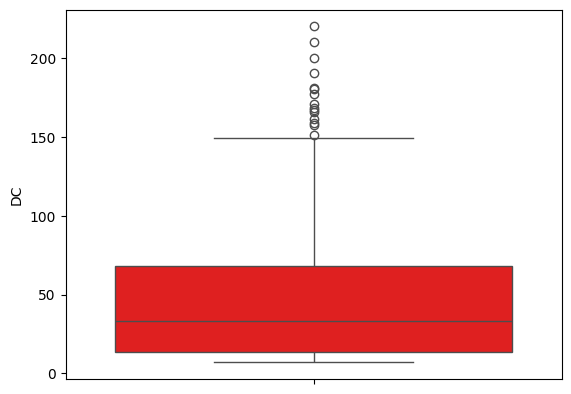

In [ ]:
sns.boxplot(df["DC"],color="red")

In [ ]:
df["Classes"].value_counts()

fire             132
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [ ]:
df["Classes"].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [ ]:
df["Classes"]=df["Classes"].str.strip()

In [ ]:
df["Classes"]=np.where(df["Classes"].str.contains("notfire"),0,1)

In [ ]:
df.drop(["day", "month", "year"], axis=1, inplace=True)

In [ ]:
X=df.drop("Temperature",axis=1)

y=df["Temperature"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)

In [ ]:
X_test.shape

(49, 10)

In [ ]:
X_train.corr()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
RH,1.000000,0.223159,0.178097,-0.600610,-0.367443,-0.169998,-0.644055,-0.306666,-0.538370,NaN
Ws,0.223159,1.000000,0.159341,-0.167857,-0.011118,0.045699,0.039734,0.013339,0.041690,NaN
Rain,0.178097,0.159341,1.000000,-0.496079,-0.263591,-0.283884,-0.330546,-0.277552,-0.312734,NaN
FFMC,-0.600610,-0.167857,-0.496079,1.000000,0.584882,0.485333,0.732087,0.573910,0.686054,NaN
DMC,-0.367443,-0.011118,-0.263591,0.584882,1.000000,0.876171,0.659632,0.982126,0.870496,NaN
DC,-0.169998,0.045699,-0.283884,0.485333,0.876171,1.000000,0.472028,0.940514,0.717094,NaN
ISI,-0.644055,0.039734,-0.330546,0.732087,0.659632,0.472028,1.000000,0.619637,0.915431,NaN
BUI,-0.306666,0.013339,-0.277552,0.573910,0.982126,0.940514,0.619637,1.000000,0.848216,NaN
FWI,-0.538370,0.041690,-0.312734,0.686054,0.870496,0.717094,0.915431,0.848216,1.000000,NaN
Classes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

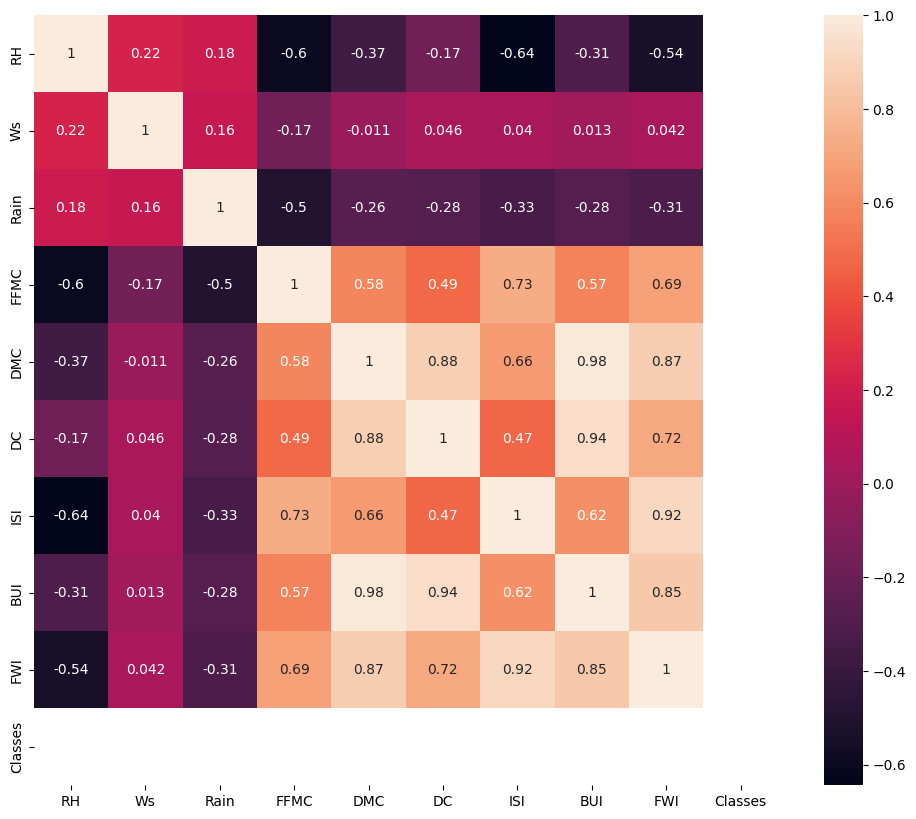

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True)